<a href="https://colab.research.google.com/github/ItayAsis9/Project/blob/main/Itay11_12_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from os import listdir
from os.path import isfile, join
import pandas as pd
from PIL import ImageTk
from tkinter import *
from tkinter import filedialog
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split

# For the tree visualization
import pydot

# For the dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# For the logistic regression
from sklearn.linear_model import LogisticRegression

# For the tree models
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# For the confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

# For the Cross validation & Grid Search
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, GridSearchCV

# For Pipeline 
from sklearn.pipeline import Pipeline, FeatureUnion

#for ROC - AUC
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from termcolor import colored


In [ ]:
#!pip install googledrivedownloader

#from google_drive_downloader import GoogleDriveDownloader as gdd

#gdd.download_file_from_google_drive(file_id='1ejtHpLaOT86BDsH2YNM6CxtoKslkrVq3',
#                                    dest_path='./Baby.zip')

In [ ]:
!pip install googledrivedownloader

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1FMvC0Xm2UxH9pc6ZOXvaHCmSd7jErWVF',
                                    dest_path='./Baby.zip')

In [ ]:
!unzip "./Baby.zip" -d "./"

Archive:  ./Baby.zip
  inflating: ./Baby/4momsWithBaby.jpg  
  inflating: ./Not_Baby/008-189_edited.webp  
  inflating: ./Not_Baby/112483_waverleytoyota-blog-infantcarseat-02.jpg  
  inflating: ./Not_Baby/112488_waverleytoyota-blog-infantcarseat-05.jpg  
  inflating: ./Not_Baby/1-500x500.png  
  inflating: ./Not_Baby/1624895067-cybex-aton-m-sensorsafe-infant-car-seat-1624895059.jpg  
  inflating: ./Not_Baby/201179.jpg   
  inflating: ./Not_Baby/227310-infantcarseats-babytrend-inertia.jpg  
  inflating: ./Not_Baby/380310.webp  
  inflating: ./Not_Baby/38a7383db144adb9dc5da9b6828fdb3c11d78a7eb25268a11fadf0433f1ad9d9.jpg  
  inflating: ./Not_Baby/39-802_s_1.jpg  
  inflating: ./Not_Baby/39-802_xxl_2.jpg  
  inflating: ./Not_Baby/399636-infant-car-seats-evenflo-gold-securemax-10011410.png  
  inflating: ./Not_Baby/41bGDWXBdBL.jpg  
  inflating: ./Not_Baby/41bQJQf2xTL.jpg  
  inflating: ./Not_Baby/41ecwdjhl4L._SR6002C315_PIWhiteStrip2CBottomLeft2C02C35_SCLZZZZZZZ_FMpng_BG2552C2552C255.jpg  

In [ ]:
def display_picture_size_save(booster_file_img,tsize,dfn,dir):

    image = Image.open(booster_file_img) 
    
    image = image.resize(tsize)
    image.thumbnail(tsize, Image.ANTIALIAS)  
    
    print(image.width, image.height,booster_file_img)
    pre, ext = os.path.splitext(booster_file_img)
    #image = image.convert('L') #convert to WB
    image = image.convert('RGB')
    image.save('./' + IMAGE_BABY_RDIR + '.jpg')
    #mylist=pd.DataFrame(np.asarray(image).reshape(-1,tsize[0] * 3 * tsize[1] )
    #mylist.append(booster_file_img)
    #df=dfn.append(mylist)
    df_tmp=pd.DataFrame(np.asarray(image).reshape(-1,tsize[0] * 3 * tsize[1] ))
    df_tmp['IMAGE_DIR']=booster_file_img
    return dfn.append(df_tmp)


  #  df=dfn.append(pd.DataFrame(np.asarray(image).reshape(-1,tsize[0] * 3 * tsize[1] )))
  #  df.at[-1,'IMAGE_DIR']=booster_file_img
  #  return df

    
    

IMAGE_BABY_DIR = r'./Baby'
IMAGE_NOTBABY_DIR = r'./Not_Baby'
IMAGE_BABY_RDIR = r'./Baby_Resized'
IMAGE_NOTBABY_RDIR = r'./Not_Baby_Resized'
list_tmp_baby = [ join(IMAGE_BABY_DIR, f) for f in listdir(IMAGE_BABY_DIR) if isfile(join(IMAGE_BABY_DIR, f))]
list_tmp_not_baby = [ join(IMAGE_NOTBABY_DIR, f) for f in listdir(IMAGE_NOTBABY_DIR) if isfile(join(IMAGE_NOTBABY_DIR, f))]

size = 50, 50

print(len(list_tmp_baby))

df_baby = pd.DataFrame()

for p in list_tmp_baby:
  df_baby = display_picture_size_save(p,size,df_baby,IMAGE_BABY_RDIR)

df_baby['Isbaby'] = 1

print(len(list_tmp_baby))

df_not_baby = pd.DataFrame()

for p in list_tmp_not_baby:
  df_not_baby = display_picture_size_save(p,size,df_not_baby,IMAGE_NOTBABY_RDIR )

df_not_baby['Isbaby'] = 0
df_not_baby.head()

df_babydataset=df_baby.append(df_not_baby)


506
50 50 ./Baby/images712.jpg
50 50 ./Baby/image6 (3).jpeg
50 50 ./Baby/image18 (6).jpeg
50 50 ./Baby/17_5_4.jpg
50 50 ./Baby/Capture7.JPG
50 50 ./Baby/1x5Ld9l5yTlRSd2S0a_DF_A.png
50 50 ./Baby/images329.jpg
50 50 ./Baby/images48 (4).jpg
50 50 ./Baby/images92.jpg
50 50 ./Baby/1-9.jpg
50 50 ./Baby/images59 (2).jpg
50 50 ./Baby/4a2557e9-766f-486e-918b-52c053044d3d_1.40738f6d796fe185290f173b8ab6003d.jpeg
50 50 ./Baby/images75.jpg
50 50 ./Baby/4momsWithBaby.jpg
50 50 ./Baby/what_makes_child_cs (1).jpg
50 50 ./Baby/images182.jpg
50 50 ./Baby/images38.jpg
50 50 ./Baby/images17 (3).jpg
50 50 ./Baby/image20 (4).jpeg
50 50 ./Baby/images57 (3).jpg
50 50 ./Baby/image4 (4).jpeg
50 50 ./Baby/image.jpeg
50 50 ./Baby/s-l400.jpg
50 50 ./Baby/images211.jpg
50 50 ./Baby/-car-seat-evolution-convertible-car-seat-with-baby-front-view-1200_1024x1024.jpg
50 50 ./Baby/images77 (2).jpg
50 50 ./Baby/images39.jpg
50 50 ./Baby/images16 (2).jpg
50 50 ./Baby/images315.jpg
50 50 ./Baby/images15 (2).jpg
50 50 ./Baby/

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50 50 ./Not_Baby/images165.jpg
50 50 ./Not_Baby/images396.jpg
50 50 ./Not_Baby/images535.jpg
50 50 ./Not_Baby/images387.jpg
50 50 ./Not_Baby/images398.jpg
50 50 ./Not_Baby/images593.jpg
50 50 ./Not_Baby/images504.jpg
50 50 ./Not_Baby/images677.jpg
50 50 ./Not_Baby/images257.jpg
50 50 ./Not_Baby/images390.jpg
50 50 ./Not_Baby/images126.jpg
50 50 ./Not_Baby/images346.jpg
50 50 ./Not_Baby/images553.jpg
50 50 ./Not_Baby/images512.jpg
50 50 ./Not_Baby/images672.jpg
50 50 ./Not_Baby/be_cool_apollo_gr_0_1_car_seat_2787-1.jpg
50 50 ./Not_Baby/images622.jpg
50 50 ./Not_Baby/images20.jpg
50 50 ./Not_Baby/images679.jpg
50 50 ./Not_Baby/images523.jpg
50 50 ./Not_Baby/images449.jpg
50 50 ./Not_Baby/images69.jpg
50 50 ./Not_Baby/images311.jpg
50 50 ./Not_Baby/images68.jpg
50 50 ./Not_Baby/images107.jpg
50 50 ./Not_Baby/images231.jpg
50 50 ./Not_Baby/images71.jpg
50 50 ./Not_Baby/39-802_xxl_2.jpg
50 50 ./Not_Baby/image12.jpeg
50 50 ./Not_Baby/images239.jpg
50 50 ./Not_Baby/images169.jpg
50 50 ./Not_B

In [ ]:
df_babydataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,IMAGE_DIR,Isbaby
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/images712.jpg,1
0,250,252,253,251,253,255,252,255,255,255,255,255,255,255,255,254,255,255,254,255,255,250,254,253,251,251,245,248,254,250,253,253,245,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/image6 (3).jpeg,1
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,70,74,80,73,80,141,134,138,255,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/image18 (6).jpeg,1
0,255,255,255,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,248,248,250,244,245,247,244,245,247,243,244,246,242,243,245,240,...,238,239,234,238,239,235,239,240,234,238,239,240,243,245,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/17_5_4.jpg,1
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/Capture7.JPG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Not_Baby/images174.jpg,0
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Not_Baby/image16.jpeg,0
0,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,...,234,234,234,234,234,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,./Not_Baby/images552.jpg,0
0,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,./Not_Baby/images345.jpg,0


# **EDA**

In [ ]:
df_babydataset.shape  

(1243, 7502)

In [ ]:
StartRow=df_babydataset.shape[0]
StartRow

1243

In [ ]:
columns_remove__duplicates=list(df_babydataset.columns)

In [ ]:
columns_remove__duplicates.remove('IMAGE_DIR')
columns_remove__duplicates.remove('Isbaby')

In [ ]:
df_babydataset = df_babydataset.drop_duplicates(columns_remove__duplicates, keep='last')

In [ ]:
Duplicates_Row=StartRow-df_babydataset.shape[0]
Duplicates_Row

156

In [ ]:
df_babydataset=df_babydataset.reset_index(drop=True)

In [ ]:
df_babydataset_image=df_babydataset['IMAGE_DIR']
df_babydataset_image=pd.DataFrame(df_babydataset_image)
df_babydataset=df_babydataset.drop('IMAGE_DIR',axis=1)

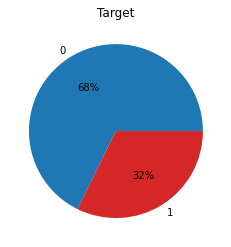

In [ ]:
import matplotlib.pyplot as plt

x = list(df_babydataset['Isbaby'].value_counts())
labels = list(df_babydataset['Isbaby'].value_counts().index)
colors = ['tab:blue', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Target')
plt.show()

# **Split data to train and test**

In [ ]:
x = df_babydataset.drop(columns = ['Isbaby'])
y = df_babydataset.Isbaby

In [ ]:
train, test = split(df_babydataset, train_size=0.8, random_state=12345)
x_train=train.drop(columns = ['Isbaby'])
x_test=test.drop(columns = ['Isbaby'])
y_train=train.Isbaby
y_test=test.Isbaby

In [ ]:
train[train['Isbaby']==1].shape[0]/train.shape[0]

0.31530494821634064

In [ ]:
test[test['Isbaby']==1].shape[0]/test.shape[0]

0.3532110091743119

# **DecisionTree with GridSearchCV**

In [ ]:
my_columns = x_train.loc[:,x_train.apply(pd.Series.nunique) != 1].columns


In [ ]:
scaler = StandardScaler()
rfc = RandomForestClassifier() 
steps = [     
         ('scaler', scaler),          
         ('rfc', rfc)
        ]
param_grid = { 
    'rfc__n_estimators': [5],
    'rfc__max_features': ['auto']
    #'rfc__max_features': ['auto', 'sqrt', 'log2']
}
         
my_pipeline = Pipeline(steps)

clf_gs = GridSearchCV(my_pipeline, param_grid, cv=5, n_jobs=10,verbose= 2)

clf_gs.fit(x_train, y_train)
y_train_pred2 = clf_gs.predict(x_train)
print(colored("Train Result:", 'green', attrs=['bold']))
print(classification_report(y_train, y_train_pred2))
y_test_pred2 = clf_gs.predict(x_test)
print(colored("Test Result:", 'green', attrs=['bold']))
print(classification_report(y_test, y_test_pred2))
print(colored("Cross Validation Scores:", 'green', attrs=['bold']))
print(clf_gs.cv_results_['mean_test_score'].mean())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       595
           1       0.99      0.97      0.98       274

    accuracy                           0.99       869
   macro avg       0.99      0.98      0.99       869
weighted avg       0.99      0.99      0.99       869

Test Result:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       141
           1       0.79      0.81      0.80        77

    accuracy                           0.86       218
   macro avg       0.84      0.85      0.84       218
weighted avg       0.86      0.86      0.86       218

Cross Validation Scores:
0.8998936947711116


In [ ]:
Incorrect_Results=pd.DataFrame(y_test)

In [ ]:
Incorrect_Results

,Isbaby
73,1
386,0
90,1
30,1
530,0
...,...
646,0
320,1
1069,0
183,1


In [ ]:
Incorrect_Results["predict"]=y_test_pred2

In [ ]:
Incorrect_Results["Proper_prediction"]=Incorrect_Results["predict"]==Incorrect_Results["Isbaby"]

In [ ]:
Incorrect_Results=Incorrect_Results[Incorrect_Results["Proper_prediction"]==False]

In [ ]:
df_babydataset_image=pd.DataFrame(df_babydataset_image)

In [ ]:
Incorrect_Results['title']="Actual: "+Incorrect_Results['Isbaby'].astype(str)+" Predict: "+Incorrect_Results['predict'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Incorrect_Results=Incorrect_Results.join(df_babydataset_image, lsuffix='_caller', rsuffix='_other')

In [ ]:
Incorrect_Results

,Isbaby,predict,Proper_prediction,title,IMAGE_DIR
73,1,0,False,Actual: 1 Predict: 0,./Baby/britaxhead_bodypillow_2400x.jpg
30,1,0,False,Actual: 1 Predict: 0,./Baby/blue_01.png
1042,0,1,False,Actual: 0 Predict: 1,./Not_Baby/images274.jpg
300,1,0,False,Actual: 1 Predict: 0,./Baby/Capture34.JPG
742,0,1,False,Actual: 0 Predict: 1,./Not_Baby/images236.jpg
864,0,1,False,Actual: 0 Predict: 1,./Not_Baby/images483.jpg
763,0,1,False,Actual: 0 Predict: 1,./Not_Baby/images380.jpg
816,0,1,False,Actual: 0 Predict: 1,./Not_Baby/images36.jpg
154,1,0,False,Actual: 1 Predict: 0,./Baby/seggiolini-auto-car_go-04_1.jpg
648,0,1,False,Actual: 0 Predict: 1,./Not_Baby/images148.jpg


In [ ]:
df_babydataset_image.loc[53]['IMAGE_DIR']==df_babydataset_image.loc[0]['IMAGE_DIR']

False

In [ ]:
df_babydataset_image.nunique()

IMAGE_DIR    1087
dtype: int64

In [ ]:
title_list=list(Incorrect_Results['title'])
image_list=list(Incorrect_Results['IMAGE_DIR'])

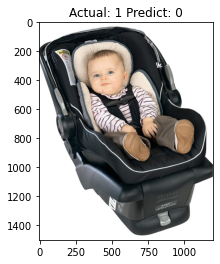

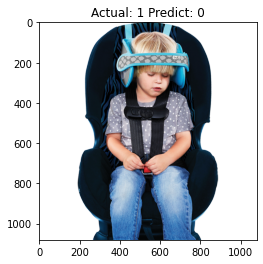

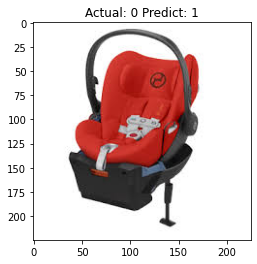

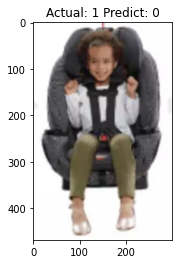

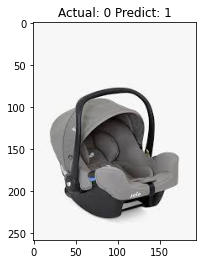

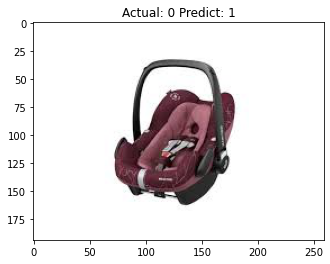

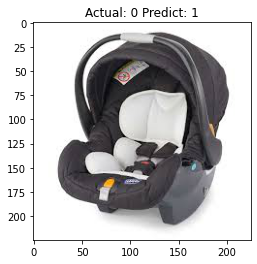

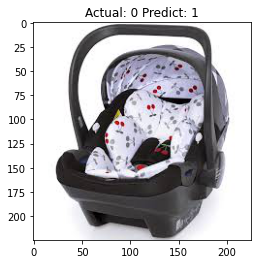

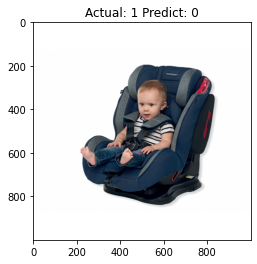

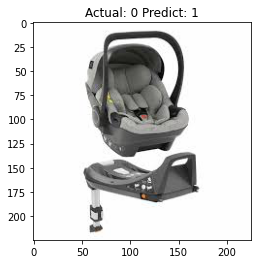

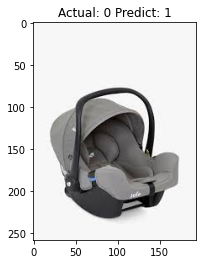

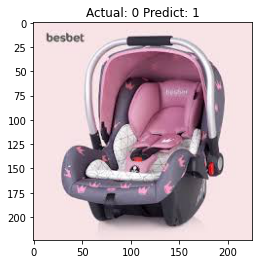

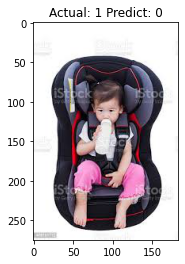

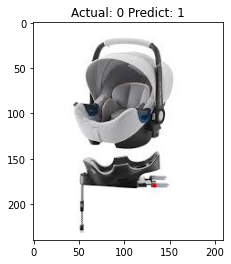

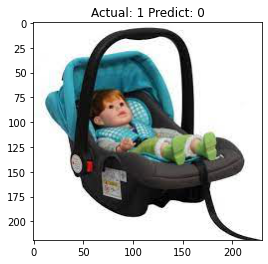

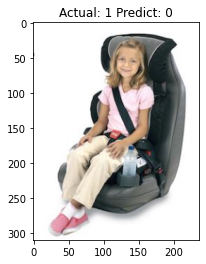

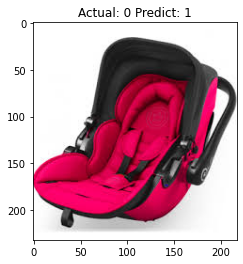

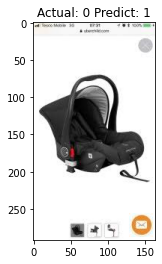

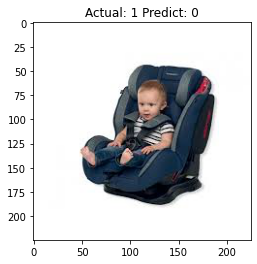

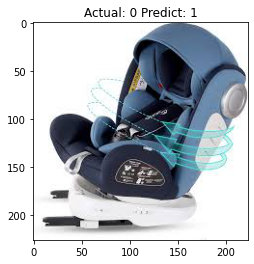

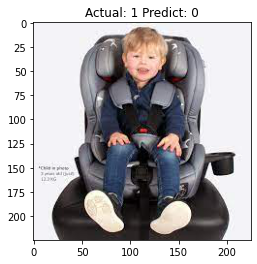

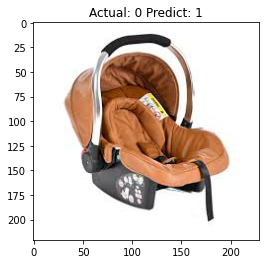

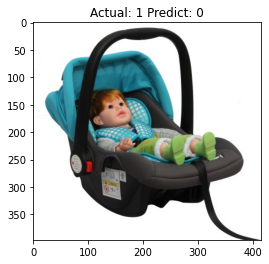

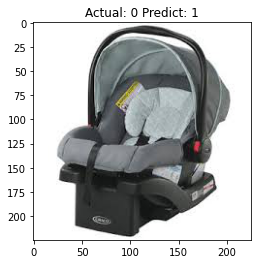

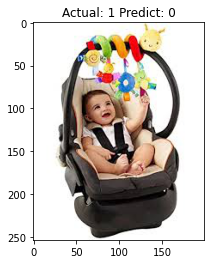

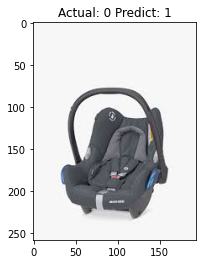

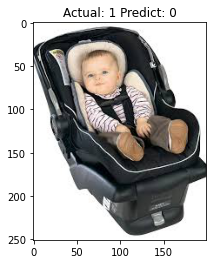

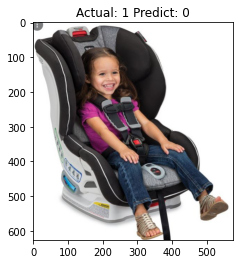

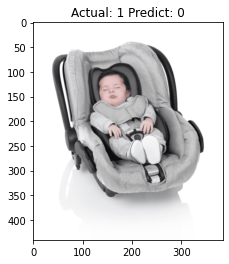

In [ ]:
for x in range(len(image_list)):
  im = Image.open(image_list[x])
  plt.title(title_list[x])
  plt.imshow(im)
  plt.show()



# **model2- CNN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import sample
from numpy.random import rand, shuffle

import string
import re
from unicodedata import normalize
from numpy import array

from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LSTM, RepeatVector, TimeDistributed, Embedding
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint

# random seeds must be set before importing keras & tensorflow
my_seed = 512
np.random.seed(my_seed)
import random 
random.seed(my_seed)

from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
img_rows, img_cols = 200, 200
num_classes=2

In [ ]:
X_train=x_train
X_test=x_test

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train

In [ ]:
Y_train=y_train
Y_test=y_test


In [ ]:
size[0]*size[1]*3

wikipedia

In [ ]:
size

In [ ]:
lst=[]
for i in range(X_train.shape[0]):
  img=X_train.iloc[i,0:size[0]*size[1]*3].to_numpy()
  img = img.reshape(size[0],size[1],3)
  lst.append(img)
X_train_arr = np.array(lst)

In [ ]:
lst=[]
for i in range(X_test.shape[0]):
  img=X_test.iloc[i,0:size[0]*size[1]*3].to_numpy()
  img = img.reshape(size[0],size[1],3)
  lst.append(img)
X_test_arr = np.array(lst)

In [ ]:
X_train_arr.shape

In [ ]:
X_train_arr.shape[1]

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model = Sequential(name="classifier")

model.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Dense(400, activation='relu'))
model.add(Dense(800, activation='relu'))

model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=5, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

#model.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()


In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train_arr, Y_train, batch_size=10, epochs=30, validation_data=(X_test_arr, Y_test))

In [ ]:
from time import time
def create_model(optimizer='rmsprop', init='glorot_uniform'):
  model =Sequential(name="classifier")
	# create model
  model.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))

  model.add(Dense(400, activation='relu'))

  model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))

  model.add(Conv2D(256, kernel_size=5, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))

  #model.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(400, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

start= time()
model = KerasClassifier(build_fn=create_model,verbose=2)
n_iter_search = 16 # Number of parameter settings that are sampled.
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150])
batches = np.array([5, 10, 20])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)

random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid,
                                   n_iter=n_iter_search)

random_search.fit(X_train_arr, y_train)


print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
print("total time:",time()-start)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))